In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
import math
import itertools
import scipy as sp
from scipy.stats import rankdata

In [636]:
train = pd.read_csv("train.csv", header=0, index_col=0)
train_add = pd.read_csv("train_add.csv", header=0, index_col=0)
add_2014 = pd.read_csv("2014_add.csv", header=0, index_col=0)
test = pd.read_csv("test.csv", header=0, index_col=0)
n_train = train.shape[0] + train_add.shape[0]
n_test = test.shape[0]
n_add = add_2014.shape[0]
print(train.shape)
print(train_add.shape)
print("n_test:",n_test)
print("n_add:",n_add)
test.head()

(1721, 10)
(232, 10)
n_test: 313
n_add: 38


,year,stage,match,gameday,time,home,away,stadium,tv
id,,,,,,,,,
15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス
15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス
15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉
15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス
15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス
15828,2014,Ｊ１,第１８節第１日,08/02(土),18:03,ガンバ大阪,横浜Ｆ・マリノス,万博記念競技場,スカパー！／スカパー！プレミアムサービス
15829,2014,Ｊ１,第１８節第１日,08/02(土),18:34,徳島ヴォルティス,ヴァンフォーレ甲府,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！／スカパー！プレミアムサービス
15830,2014,Ｊ１,第１８節第１日,08/02(土),19:04,サガン鳥栖,名古屋グランパス,ベストアメニティスタジアム,スカパー！／スカパー！プレミアムサービス
15831,2014,Ｊ１,第１９節第１日,08/09(土),19:04,大宮アルディージャ,ガンバ大阪,ＮＡＣＫ５スタジアム大宮,スカパー！／スカパー！プレミアムサービス／テレ玉


In [3]:
condition = pd.read_csv(
    "condition.csv", header=0, index_col=0)
condition_add = pd.read_csv(
    "condition_add.csv", header=0, index_col=0)
print(condition.columns)
print(condition.shape)
print(condition_add.shape)
condition.head()

Index(['home_score', 'away_score', 'weather', 'temperature', 'humidity',
       'referee', 'home_team', 'home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_team', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11'],
      dtype='object')
(2034, 30)
(270, 30)


,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
id,,,,,,,,,,,,,,,,,,,,,
13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [4]:
stadium = pd.read_csv("stadium.csv", header=0)
stadium

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576
5,レベルファイブスタジアム,福岡県福岡市博多区東平尾公園2-1-1,22563
6,北九州市立本城陸上競技場,福岡県北九州市八幡西区御開4-16-1,10202
7,岐阜メモリアルセンター長良川競技場,岐阜県岐阜市長良福光大野2675-28,20000
8,正田醤油スタジアム群馬,群馬県前橋市敷島町66,15135
9,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000


In [5]:
train_test =  pd.concat((train, train_add, add_2014, test), axis=0)
train_test_condi = pd.concat((condition, condition_add), axis=0)
print(train_test.shape)
print(train_test_condi.shape)

(2304, 10)
(2304, 30)


In [6]:
df_train_test = pd.merge(
    train_test, train_test_condi, right_index=True, left_index=True)
print(df_train_test.shape)
print(df_train_test)

(2304, 40)
              away     gameday         home    match                stadium  \
id                                                                            
13994     鹿島アントラーズ    03/10(土)       ベガルタ仙台   第１節第１日           ユアテックスタジアム仙台   
13995      清水エスパルス    03/10(土)     名古屋グランパス   第１節第１日                豊田スタジアム   
13996      ヴィッセル神戸    03/10(土)        ガンバ大阪   第１節第１日                万博記念競技場   
13997        浦和レッズ    03/10(土)    サンフレッチェ広島   第１節第１日           エディオンスタジアム広島   
13998       ジュビロ磐田    03/10(土)     コンサドーレ札幌   第１節第１日                  札幌ドーム   
13999       セレッソ大阪    03/10(土)        サガン鳥栖   第１節第１日          ベストアメニティスタジアム   
14000    アルビレックス新潟    03/10(土)     川崎フロンターレ   第１節第１日               等々力陸上競技場   
14001         ＦＣ東京    03/10(土)    大宮アルディージャ   第１節第１日           ＮＡＣＫ５スタジアム大宮   
14002     横浜Ｆ・マリノス    03/11(日)        柏レイソル   第１節第２日               日立柏サッカー場   
14004        柏レイソル    03/17(土)        浦和レッズ   第２節第１日            埼玉スタジアム２００２   
14005       ベガルタ仙台    03/17(土)     横浜Ｆ・マリ

In [7]:
drop_ls = []
for i in range(1,12):
    if i < 10:
        drop_ls.append("home_0%d"%i)
        drop_ls.append("away_0%d"%i)
    else:
        drop_ls.append("home_%d"%i)
        drop_ls.append("away_%d"%i)
print(drop_ls)

['home_01', 'away_01', 'home_02', 'away_02', 'home_03', 'away_03', 'home_04', 'away_04', 'home_05', 'away_05', 'home_06', 'away_06', 'home_07', 'away_07', 'home_08', 'away_08', 'home_09', 'away_09', 'home_10', 'away_10', 'home_11', 'away_11']


In [8]:
df_train_test.columns

Index(['away', 'gameday', 'home', 'match', 'stadium', 'stage', 'time', 'tv',
       'y', 'year', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11'],
      dtype='object')

In [9]:
drop_ls.append("referee")
df_train_test_dr = df_train_test.drop(drop_ls, axis=1)
df_train_test_dr.head()

,away,gameday,home,match,stadium,stage,time,tv,y,year,home_score,away_score,weather,temperature,humidity,home_team,away_team
id,,,,,,,,,,,,,,,,,
13994,鹿島アントラーズ,03/10(土),ベガルタ仙台,第１節第１日,ユアテックスタジアム仙台,Ｊ１,14:04,スカパー／ｅ２／スカパー光／ＮＨＫ総合,18250.0,2012,1,0,雨,3.8,66%,ベガルタ仙台,鹿島アントラーズ
13995,清水エスパルス,03/10(土),名古屋グランパス,第１節第１日,豊田スタジアム,Ｊ１,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,24316.0,2012,1,0,屋内,12.4,43%,名古屋グランパス,清水エスパルス
13996,ヴィッセル神戸,03/10(土),ガンバ大阪,第１節第１日,万博記念競技場,Ｊ１,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,17066.0,2012,2,3,晴一時雨,11.3,41%,ガンバ大阪,ヴィッセル神戸
13997,浦和レッズ,03/10(土),サンフレッチェ広島,第１節第１日,エディオンスタジアム広島,Ｊ１,14:06,スカパー／ｅ２／スカパー光／ＮＨＫ広島,29603.0,2012,1,0,曇一時雨のち晴,11.4,52%,サンフレッチェ広島,浦和レッズ
13998,ジュビロ磐田,03/10(土),コンサドーレ札幌,第１節第１日,札幌ドーム,Ｊ１,14:04,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,25353.0,2012,0,0,屋内,22.5,32%,コンサドーレ札幌,ジュビロ磐田


In [685]:
home_mean = df_train_test.iloc[:n_train,:].groupby("home")["y"].mean()
home_mean
away_mean = df_train_test.iloc[:n_train,:].groupby("away")["y"].mean()
away_mean
weather_mean = df_train_test.iloc[:n_train,:].groupby("weather")["y"].mean()
weather_mean
j1_j2 = {"Ｊ１":1,"Ｊ２":2}
away_mean

away
アビスパ福岡          6210.444444
アルビレックス新潟      15577.162791
カターレ富山          5278.203704
カマタマーレ讃岐        6534.307692
ガイナーレ鳥取         6138.571429
ガンバ大阪          17928.148936
ギラヴァンツ北九州       5686.574074
コンサドーレ札幌        9585.326531
サガン鳥栖          15970.744186
サンフレッチェ広島      18655.690476
ザスパクサツ群馬        5779.441176
ザスパ草津           5449.523810
ジェフユナイテッド千葉     6159.555556
ジュビロ磐田         14579.577778
セレッソ大阪         19869.452381
ファジアーノ岡山        5697.555556
ベガルタ仙台         16512.581395
モンテディオ山形        5990.759259
ロアッソ熊本          5828.296296
ヴァンフォーレ甲府      10945.804348
ヴィッセル神戸        11431.478261
京都サンガF.C.       6429.218182
名古屋グランパス       17452.428571
大分トリニータ         8914.200000
大宮アルディージャ      15682.930233
川崎フロンターレ       18084.476190
徳島ヴォルティス        7441.627451
愛媛ＦＣ            5857.679245
東京ヴェルディ         6208.925926
松本山雅ＦＣ          6955.870370
柏レイソル          16722.571429
栃木ＳＣ            5596.054545
横浜Ｆ・マリノス       17623.627907
横浜ＦＣ            7748.981481
水戸ホーリーホック       5406.703704
浦和レッズ          

In [980]:

def categorize_home(team):
    if home_mean[team] < 10000:
        return 1
    elif home_mean[team] < 15000:
        return 2
    elif home_mean[team] < 20000:
        return 3
    else:
        return 4
    
def home_mean_ob(team):
    return home_mean[team]
    
def categorize_away(team):
    if away_mean[team] < 10000:
        return 0
    else:
        return 1

def away_mean_ob(team):
    return away_mean[team]
    
def get_youbi(text):
    pattern = re.compile(r".+?\(.*?(\S)\)")
    youbi = pattern.findall(text)[0]
    if youbi in ["月","火","木","金"]:
        return "他"
    else:
        return youbi

def get_month(text):
    pattern = re.compile(r"(^.+?)\/.+")
    month = int(pattern.findall(text)[0])
    return month

def get_categorical_day(text):
    pattern = re.compile(r".+?/([0-9]+?)\(.+")
    day = int(pattern.findall(text)[0])
    if day < 10:
        return 1
    elif day < 20:
        return 2
    else:
        return 3

def get_match_number(text):
    pattern = re.compile(r"第(.+?)節.*")
    match_number = int(pattern.findall(text)[0])
    return match_number

def categorical_match_number(text):
    match_num = get_match_number(text)
    if match_num < 11:
        return 1
    elif match_num < 22:
        return 2
    else:
        return 3

def get_city(text):
    pattern = re.compile(r"(.+?市).+")
    city = pattern.findall(text)
    return city

def get_hour(text):
    pattern = re.compile(r"([0-9]+?):.+")
    hour = int(pattern.findall(text)[0])
    return hour

def get_categorical_weather(text):
    if weather_mean[text] < 15000:
        return 0
    else:
        return 1
    
def get_nhk(text):
    if "ＮＨＫ総合" in text:
        return 2
    elif "ＮＨＫ" in text:
        return 1
    else:
        return 0
    
def get_humidity(text):
    pattern = re.compile(r"([0-9]+?)%")
    humid = int(pattern.findall(text)[0])
    return humid/100

def get_point(df):
    diff = df["home_score"] - df["away_score"]
    if diff < 0:
        return 0
    elif diff == 0:
        return 1
    else:
        return 3
    
def get_away_point(df):
    diff = df["away_score"] - df["home_score"]
    if diff < 0:
        return 0
    elif diff == 0:
        return 1
    else:
        return 3
    
def get_combi(df):
    combi = df["home"][0] + df["away"][0]
    return combi

def dec_year(year):
    return year-2012

def check_large(num):
    if math.isnan(num):
        return 0
    elif num > 17000:
        return 1
    else:
        return -1
    
def mean_combi(df):
    combi = df.combi
    mean = df_train_test_me.iloc[:n_train,:].groupby("combi")["y"].mean()[combi]
    if math.isnan(mean):
        return df.mean_home + df.mean_away
    else:
        return mean

def home_pl_away(df):
    return df["home"]

def get_accum_pt(df, year, stage, team):
    pt_ls = []
    new_df = df[(df.year==year) & (df.stage==stage)]
    for i in range(new_df.shape[0]):
        if team == new_df.iloc[i,2]:
            pt_ls.append(new_df.iloc[i,32])
        elif team == new_df.iloc[i, 0]:
            pt_ls.append(new_df.iloc[i, 33])
        else:
            continue
    return list(itertools.accumulate(pt_ls))

def return_categorical_combi(text):
    if text < -1.274:
        return 1
    elif text < -0.849:
        return 2
    elif text < -0.478:
        return 3
    elif text < 0.0912:
        return 4
    else:
        return 5

In [667]:
def get_team_dict():
    team_dict = dict()
    for year in range(3):
        team_dict[str(year)] = {}
        for stage in range(1,3):
            team_dict[str(year)][str(stage)] = {}
            df = df_train_test_me[
                (df_train_test_me.year==year) & (df_train_test_me.stage==stage)]
            teams = np.unique(df["home"].values)
            for team in teams:
                pt_ls = get_accum_pt(df, year, stage, team)
                team_dict[str(year)][str(stage)][team] = pt_ls
    return team_dict

In [22]:
get_match_number("第１２３節")

123

In [23]:
pattern = re.compile(r"(.+?)\/.+")
pattern.findall("12/10(土・祝)")[0]

'12'

In [24]:
df_train_test_me = pd.merge(
    df_train_test_dr, stadium, left_on="stadium",
    right_on="name", how="left")
df_train_test_me.isnull().sum()
print(df_train_test_me.shape)
df_train_test_me.head()

(2304, 20)


,away,gameday,home,match,stadium,stage,time,tv,y,year,home_score,away_score,weather,temperature,humidity,home_team,away_team,name,address,capa
0,鹿島アントラーズ,03/10(土),ベガルタ仙台,第１節第１日,ユアテックスタジアム仙台,Ｊ１,14:04,スカパー／ｅ２／スカパー光／ＮＨＫ総合,18250.0,2012,1,0,雨,3.8,66%,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
1,清水エスパルス,03/10(土),名古屋グランパス,第１節第１日,豊田スタジアム,Ｊ１,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,24316.0,2012,1,0,屋内,12.4,43%,名古屋グランパス,清水エスパルス,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,ヴィッセル神戸,03/10(土),ガンバ大阪,第１節第１日,万博記念競技場,Ｊ１,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,17066.0,2012,2,3,晴一時雨,11.3,41%,ガンバ大阪,ヴィッセル神戸,万博記念競技場,大阪府吹田市千里万博公園5-2,21000
3,浦和レッズ,03/10(土),サンフレッチェ広島,第１節第１日,エディオンスタジアム広島,Ｊ１,14:06,スカパー／ｅ２／スカパー光／ＮＨＫ広島,29603.0,2012,1,0,曇一時雨のち晴,11.4,52%,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000
4,ジュビロ磐田,03/10(土),コンサドーレ札幌,第１節第１日,札幌ドーム,Ｊ１,14:04,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,25353.0,2012,0,0,屋内,22.5,32%,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,北海道札幌市豊平区羊ヶ丘1,39232


In [25]:
df_train_test_me["combi"] = df_train_test_me.apply(get_combi, axis=1)
df_train_test_me["categorical_home"] = df_train_test_me["home"].apply(categorize_home)
df_train_test_me["categorical_away"] = df_train_test_me["away"].apply(categorize_away)
df_train_test_me["youbi"] = df_train_test_me["gameday"].apply(get_youbi)
df_train_test_me["month"] = df_train_test_me["gameday"].apply(get_month)
df_train_test_me["categorical_day"] = df_train_test_me["gameday"].apply(get_categorical_day)
df_train_test_me["match_num"] = df_train_test_me["match"].apply(get_match_number)
df_train_test_me["categorical_match_num"] = df_train_test_me["match"].apply(categorical_match_number)
df_train_test_me["city"] = df_train_test_me["address"].apply(get_city)
df_train_test_me["hour"] = df_train_test_me["time"].apply(get_hour)
df_train_test_me["categorical_weather"] = df_train_test_me["weather"].apply(get_categorical_weather)
df_train_test_me["nhk"] = df_train_test_me["tv"].apply(get_nhk)
df_train_test_me["humidity"] = df_train_test_me["humidity"].apply(get_humidity)
df_train_test_me["home_point"] = df_train_test_me.apply(get_point, axis=1)
df_train_test_me["away_point"] = df_train_test_me.apply(get_away_point, axis=1)
df_train_test_me["stage"] = df_train_test_me["stage"].map(j1_j2)
df_train_test_me["year"] = df_train_test_me["year"].apply(dec_year)
df_train_test_me["mean_combi"] = df_train_test_me["combi"].apply(mean_combi)
df_train_test_me["mean_home"] = df_train_test_me["home"].apply(home_mean_ob)
df_train_test_me["mean_away"] = df_train_test_me["away"].apply(away_mean_ob)

# get_accum,get_team_dict,get_rankのテスト

In [26]:
print(get_accum_pt(df_train_test_me, 1,1,"浦和レッズ"))

[3, 6, 7, 10, 13, 16, 16, 16, 17, 18, 21, 24, 27, 28, 28, 28, 31, 34, 37, 40, 40, 43, 43, 44, 47, 50, 53, 54, 54, 54, 54, 57, 57, 58]


In [27]:
team_dict = get_team_dict()
team_dict

{'0': {'1': {'アルビレックス新潟': [0,
    0,
    0,
    1,
    2,
    5,
    5,
    5,
    8,
    8,
    9,
    9,
    9,
    12,
    12,
    13,
    16,
    17,
    20,
    21,
    21,
    24,
    24,
    25,
    26,
    29,
    30,
    31,
    31,
    34,
    34,
    37,
    37,
    40],
   'ガンバ大阪': [0,
    0,
    1,
    1,
    4,
    7,
    7,
    8,
    8,
    9,
    10,
    10,
    10,
    13,
    13,
    13,
    13,
    14,
    17,
    18,
    18,
    19,
    22,
    23,
    23,
    26,
    27,
    28,
    31,
    32,
    32,
    32,
    35,
    38],
   'コンサドーレ札幌': [1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    7,
    7,
    7,
    7,
    10,
    11,
    11,
    11,
    11,
    11,
    11,
    14,
    14,
    14,
    14,
    14,
    14],
   'サガン鳥栖': [1,
    1,
    4,
    7,
    7,
    10,
    13,
    14,
    15,
    16,
    16,
    19,
    19,
    20,
    23,
    23,
    26,
    27,
    30,
    33,
    34,
    37,
 

In [28]:
def get_rank(stage, year):
    team_num = len(np.unique(
        df_train_test_me[(df_train_test_me.stage==stage) & \
                         (df_train_test_me.year==year)]["home"].values))
    match_num = len(np.unique(
        df_train_test_me[(df_train_test_me.stage==stage) & \
                         (df_train_test_me.year==year)]["match_num"].values))
    rank = np.empty((team_num,match_num))
    team_dict = get_team_dict()
    target_dict = team_dict[str(year)][str(stage)]
    team_ls = [i[0] for i in sorted(target_dict.items(),key=lambda x:x[0])]
    point_ls = np.array([i[1] for i in sorted(target_dict.items(), key=lambda x:x[0])])
    for i in range(match_num):
        rank[:,i] = team_num + 1 - rankdata(point_ls[:,i],method="min").astype(int)
    return rank, team_ls

In [29]:
rank, team_ls = get_rank(1,1)
for i in range(18):
    print(team_ls[i])
    print(rank[i,:])

アルビレックス新潟
[ 14.  18.  10.  12.  14.  12.  14.  13.  13.  13.  12.  13.  13.  12.  11.
  10.  10.  11.  10.   9.  10.   9.   9.  10.   9.  10.   9.   8.   7.   7.
   7.   8.   7.   7.]
サガン鳥栖
[ 14.  18.  18.  18.  18.  18.  18.  18.  18.  18.  18.  18.  16.  17.  18.
  17.  15.  15.  15.  15.  13.  14.  15.  15.  15.  13.  13.  12.  12.  12.
  12.  13.  13.  12.]
サンフレッチェ広島
[ 18.  18.  10.  12.  10.   7.   7.   9.  12.   8.   7.   6.   5.   4.   3.
   2.   2.   2.   3.   3.   3.   3.   2.   3.   3.   4.   4.   4.   3.   2.
   1.   2.   2.   1.]
ジュビロ磐田
[ 14.  18.  18.  18.  18.  18.  16.  16.  16.  18.  18.  17.  18.  16.  15.
  16.  17.  17.  17.  17.  17.  17.  16.  17.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  17.]
セレッソ大阪
[  6.   3.   5.   7.  10.  11.   7.   9.   8.   6.   5.   7.   6.   5.   7.
   7.   6.   7.   5.   6.   8.   7.   6.   6.   6.   6.   6.   6.   6.   6.
   4.   5.   6.   5.]
ベガルタ仙台
[ 14.  18.  10.  12.  14.  14.  14.  13.  12.  12.  13.  13.  13.  12.  11.
  10.  

In [30]:
print(len(df_train_test_me.columns))
print(df_train_test_me.columns)

37
Index(['away', 'gameday', 'home', 'match', 'stadium', 'stage', 'time', 'tv',
       'y', 'year', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'home_team', 'away_team', 'name', 'address', 'capa',
       'combi', 'categorical_home', 'categorical_away', 'youbi', 'month',
       'categorical_day', 'match_num', 'categorical_match_num', 'city', 'hour',
       'categorical_weather', 'nhk', 'home_point', 'away_point', 'mean_combi',
       'mean_home', 'mean_away'],
      dtype='object')


In [31]:
df_train_test_me["match_num"][30]

4

In [32]:
from tqdm import tqdm
df_train_test_me["home_rank"] = np.zeros((df_train_test_me.shape[0],))
df_train_test_me["away_rank"] = np.zeros((df_train_test_me.shape[0],))
for idx in tqdm(range(df_train_test_me.shape[0])):
    stage = df_train_test_me["stage"].values[idx]
    year = df_train_test_me["year"].values[idx]
    rank, team_ls = get_rank(stage, year)
    match_num = df_train_test_me.ix[idx,"match_num"] - 1
    if match_num == 0:
        df_train_test_me.iloc[idx,37] = 9
        df_train_test_me.iloc[idx,38] = 9
    else:
        df_train_test_me.iloc[idx,37] = \
            rank[team_ls.index(df_train_test_me.iloc[idx,2]),match_num]
        df_train_test_me.iloc[idx,38] = \
            rank[team_ls.index(df_train_test_me.iloc[idx,0]),match_num]

  3%|▎         | 78/2304 [01:03<30:03,  1.23it/s]

KeyboardInterrupt: 

In [1184]:
df_train_test_me = df_train_test_me.drop(
    ["mean_combi"], axis=1)

In [1186]:
def is_urawa(text):
    if text == "浦和レッズ":
        return 1
    else:
        return 0

In [1187]:
df_train_test_me["is_urawa"] = df_train_test_me.home.apply(is_urawa)

In [1188]:
def return_categorical_combi(text):
    if text < -0.849:
        return 1
    elif text < -0.478:
        return 2
    elif text < 0.0912:
        return 3
    elif text < 0.638:
        return 4
    else:
        return 5

In [1189]:
def categorize_home(team):
    home_split = np.unique(pd.qcut(df_train_test_me.mean_home,5))
    for i in range(5):
        if team in home_split[i]:
            return i
        
def big_capa(capa):
    if capa < 15000:
        return 0
    elif capa < 25000:
        return 1
    elif capa < 35000:
        return 2
    else:
        return 3
    
def top_last(df):
    if (df.match_num in [33,34]) & ((df.home_rank < 3) | \
    (df.away_rank < 3)):
        return 1
    else:
        return 0
def worst_last(df):
    if (df.match_num in [33,34]) & ((df.home_rank > 15) | \
    (df.away_rank > 15)) & (df.stage == 1):
        return 1
    else:
        return 0

def is_first(df):
    if (df.match_num in [1,2,3]) & (df.stage == 1):
        return 1
    else:
        return 0
def per(df):
    return df.mean_combi / df.capa

"""
def categorical_weatehr(text):
    if text in df_train_test_me.weather.value_counts()[
        df_train_test_me.weather.value_counts() < 10].index:
        return "other"
    elif text 
"""
def begin_weather(text):
    weather = text[0]
    if weather == "雨":
        return "rain"
    elif weather == "晴":
        return "fine"
    elif weather == "曇" :
        return "cloud"
    else:
        return "in"

def mean_combi(df):
    combi = df.combi
    mean_ls = df_train_test_me.groupby("combi")["y"].mean().index
    means = df_train_test_me.groupby("combi")["y"].mean()
    if combi in mean_ls:
        return means[combi]
    else:
        return df.mean_home + df.mean_away
    
def get_day(text):
    pattern = re.compile(r".+?/([0-9]+?)\(.+")
    day = int(pattern.findall(text)[0])
    return day

def num_bro(text):
    num = len(text.split("／"))
    if num > 3:
        return 4
    else:
        return num

In [1190]:
df_train_test_me.iloc[:n_train,:].groupby("combi")["y"].mean().index

Index(['カア', 'カカ', 'ガア', 'ガカ', 'ガガ', 'ギア', 'ギカ', 'ギガ', 'コア', 'コカ',
       ...
       'Ｖ大', 'Ｖ徳', 'Ｖ愛', 'Ｖ東', 'Ｖ松', 'Ｖ栃', 'Ｖ横', 'Ｖ水', 'Ｖ湘', 'ＶＦ'],
      dtype='object', name='combi', length=386)

In [1191]:
df_train_test_me["nhk"] = df_train_test_me["tv"].apply(get_nhk)
df_train_test_me["combi"] = \
    df_train_test_me.apply(get_combi, axis=1)
df_train_test_me["other_br"] = \
    df_train_test_me.tv.apply(num_bro)
#    df_train_test_me["mean_home"].apply(categorize_home)
df_train_test_me["big_capa"] = \
    df_train_test_me["capa"].apply(big_capa)
df_train_test_me["top_last"] = \
    df_train_test_me.apply(top_last, axis=1)
df_train_test_me["worst_last"] = \
    df_train_test_me.apply(worst_last, axis=1)
#df_train_test_me["is_first"] = df_train_test_me.apply(is_first, axis=1)
#df_train_test_me["per"] = \
#    df_train_test_me.apply(per, axis=1)
df_train_test_me["begin_weather"] = \
    df_train_test_me["weather"].apply(begin_weather)
df_train_test_me.head()

,away,gameday,home,match,stadium,stage,time,tv,y,year,...,mean_home,mean_away,home_rank,away_rank,is_urawa,other_br,big_capa,top_last,worst_last,begin_weather
0,鹿島アントラーズ,03/10(土),ベガルタ仙台,第１節第１日,ユアテックスタジアム仙台,1,14:04,スカパー／ｅ２／スカパー光／ＮＨＫ総合,18250.0,0,...,15353.904762,20289.139535,9.0,9.0,0,4,1,0,0,rain
1,清水エスパルス,03/10(土),名古屋グランパス,第１節第１日,豊田スタジアム,1,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,24316.0,0,...,17226.744186,16187.348837,9.0,9.0,0,4,3,0,0,in
2,ヴィッセル神戸,03/10(土),ガンバ大阪,第１節第１日,万博記念競技場,1,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,17066.0,0,...,13449.891304,11431.478261,9.0,9.0,0,4,1,0,0,fine
3,浦和レッズ,03/10(土),サンフレッチェ広島,第１節第１日,エディオンスタジアム広島,1,14:06,スカパー／ｅ２／スカパー光／ＮＨＫ広島,29603.0,0,...,16494.209302,23127.880952,9.0,9.0,0,4,3,0,0,cloud
4,ジュビロ磐田,03/10(土),コンサドーレ札幌,第１節第１日,札幌ドーム,1,14:04,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,25353.0,0,...,10837.254902,14579.577778,9.0,9.0,0,4,3,0,0,in


In [1192]:
combi = pd.get_dummies(df_train_test_me["combi"])
weather = pd.get_dummies(df_train_test_me["begin_weather"])
youbi = pd.get_dummies(df_train_test_me["youbi"])
combi = pd.get_dummies(df_train_test_me["combi"])
df_train_test_me = pd.merge(df_train_test_me,combi,
                           left_index=True, right_index=True)
df_train_test_me = pd.merge(df_train_test_me,weather,
                           left_index=True, right_index=True)
df_train_test_me = pd.merge(df_train_test_me,youbi,
                           left_index=True, right_index=True)
df_train_test_me.head()

,away,gameday,home,match,stadium,stage,time,tv,y,year,...,cloud,fine,in,rain,他,休,土,日,水,祝
0,鹿島アントラーズ,03/10(土),ベガルタ仙台,第１節第１日,ユアテックスタジアム仙台,1,14:04,スカパー／ｅ２／スカパー光／ＮＨＫ総合,18250.0,0,...,0,0,0,1,0,0,1,0,0,0
1,清水エスパルス,03/10(土),名古屋グランパス,第１節第１日,豊田スタジアム,1,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,24316.0,0,...,0,0,1,0,0,0,1,0,0,0
2,ヴィッセル神戸,03/10(土),ガンバ大阪,第１節第１日,万博記念競技場,1,14:04,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,17066.0,0,...,0,1,0,0,0,0,1,0,0,0
3,浦和レッズ,03/10(土),サンフレッチェ広島,第１節第１日,エディオンスタジアム広島,1,14:06,スカパー／ｅ２／スカパー光／ＮＨＫ広島,29603.0,0,...,1,0,0,0,0,0,1,0,0,0
4,ジュビロ磐田,03/10(土),コンサドーレ札幌,第１節第１日,札幌ドーム,1,14:04,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,25353.0,0,...,0,0,1,0,0,0,1,0,0,0


In [1198]:
df_train_test_me.columns

Index(['away', 'gameday', 'home', 'match', 'stadium', 'stage', 'time', 'tv',
       'y', 'year',
       ...
       'cloud', 'fine', 'in', 'rain', '他', '休', '土', '日', '水', '祝'],
      dtype='object', length=819)

# 正規化（しなかった）

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1 = StandardScaler()
sc2 = StandardScaler()
sc3 = StandardScaler()
sc4 = StandardScaler()
sc.fit(df_train_test_me["temperature"].values.reshape(-1,1))
sc1.fit(df_train_test_me["capa"].values.reshape(-1,1))
df_train_test_me["temperature"] = sc.transform(df_train_test_me["temperature"].values.reshape(-1,1))
df_train_test_me["capa"] = sc1.transform(df_train_test_me["capa"].values.reshape(-1,1))
ss = StandardScaler()
#df_train_test_me["humidity"] = \
#    ss.fit_transform(df_train_test_me["humidity"].reshape(-1,1))
df_train_test_me["mean_combi"] = \
    sc2.fit_transform(df_train_test_me["mean_combi"].reshape(-1,1))
df_train_test_me["mean_home"] = \
    sc2.fit_transform(df_train_test_me["mean_home"].reshape(-1,1))
df_train_test_me["mean_away"] = \
    sc2.fit_transform(df_train_test_me["mean_away"].reshape(-1,1))

In [1199]:
drop_ls = ["stadium", "gameday", "match", "time", 
          "tv", "home_team", "away_team", "name", 
          "address", "weather", "away",
          "match", "stadium", "home_point", "away_point" ,"home_score", "away_score",
           "city", "youbi", "humidity", "month", "year", "hour", "home"
          "begin_weather"]
df_train_test_me = df_train_test_me.drop(drop_ls, axis=1)
df_train_test_me.head()

,home,stage,y,temperature,capa,combi,categorical_home,categorical_away,categorical_day,match_num,...,cloud,fine,in,rain,他,休,土,日,水,祝
0,ベガルタ仙台,1,18250.0,3.8,19694,ベ鹿,3,1,2,1,...,0,0,0,1,0,0,1,0,0,0
1,名古屋グランパス,1,24316.0,12.4,40000,名清,3,1,2,1,...,0,0,1,0,0,0,1,0,0,0
2,ガンバ大阪,1,17066.0,11.3,21000,ガヴ,2,1,2,1,...,0,1,0,0,0,0,1,0,0,0
3,サンフレッチェ広島,1,29603.0,11.4,50000,サ浦,3,1,2,1,...,1,0,0,0,0,0,1,0,0,0
4,コンサドーレ札幌,1,25353.0,22.5,39232,コジ,2,1,2,1,...,0,0,1,0,0,0,1,0,0,0


In [1201]:
print(n_test)
df_train_test_me.isnull().sum()

313


home                       0
stage                      0
y                        351
temperature                0
capa                       0
combi                      0
categorical_home           0
categorical_away           0
categorical_day            0
match_num                  0
categorical_match_num      0
categorical_weather        0
nhk                        0
mean_home                  0
mean_away                  0
home_rank                  0
away_rank                  0
is_urawa                   0
other_br                   0
big_capa                   0
top_last                   0
worst_last                 0
アカ                         0
アガ                         0
アギ                         0
アコ                         0
アサ                         0
アザ                         0
アジ                         0
アセ                         0
                        ... 
Ｖガ                         0
Ｖギ                         0
Ｖコ                         0
Ｖザ            

# 分割

In [1202]:
n_test = test.shape[0]
y = df_train_test_me["y"][:-n_test-n_add]
X = df_train_test_me.drop(["y"], axis=1)
X = X.iloc[:-n_test-n_add]
true_test =df_train_test_me.iloc[-n_test:]
X.head()

,home,stage,temperature,capa,combi,categorical_home,categorical_away,categorical_day,match_num,categorical_match_num,...,cloud,fine,in,rain,他,休,土,日,水,祝
0,ベガルタ仙台,1,3.8,19694,ベ鹿,3,1,2,1,1,...,0,0,0,1,0,0,1,0,0,0
1,名古屋グランパス,1,12.4,40000,名清,3,1,2,1,1,...,0,0,1,0,0,0,1,0,0,0
2,ガンバ大阪,1,11.3,21000,ガヴ,2,1,2,1,1,...,0,1,0,0,0,0,1,0,0,0
3,サンフレッチェ広島,1,11.4,50000,サ浦,3,1,2,1,1,...,1,0,0,0,0,0,1,0,0,0
4,コンサドーレ札幌,1,22.5,39232,コジ,2,1,2,1,1,...,0,0,1,0,0,0,1,0,0,0


In [1204]:
true_test = true_test.drop(["y"], axis=1)

In [1205]:
print(X.shape)
print(y.shape)
print(true_test.shape)

(1953, 796)
(1953,)
(313, 796)


In [1206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1207]:
X_train =X_train.drop(["combi"], axis=1)
X_test =X_test.drop(["combi"], axis=1)
true_test = true_test.drop(["combi"], axis=1)

# 分割終わり

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from lightgbm.basic import Dataset
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
kf = StratifiedKFold(n_splits=5)

knn = KNeighborsRegressor(n_jobs=-1)
lr = LogisticRegression()
forest = RandomForestRegressor()
ada = AdaBoostRegressor()
et = ExtraTreesRegressor()
lgbm = lgb.LGBMRegressor(n_jobs=1, objective='regression',
             task='train',
             boosting='gbdt',
             num_iterations=300,
             learning_rate=0.5,
             num_leaves=4,
             tree_learner='serial',
             min_data_in_leaf=1,
             min_sum_hessian_in_leaf=0.1,
             boost_from_average=False,
             bagging_freq=0,
             feature_fraction=1.0,
             output_model='LGB_model.txt',
             is_sparse=False,
             is_training_metric=True,
             metric='mse',
             metric_freq=1)
lgbm_r = lgb.LGBMRegressor(boosting='gbdt',
             num_iterations=300,
            metric='mse')
param_distributions={'max_depth': sp.stats.randint(1,11),
                     'subsample': sp.stats.uniform(0.5,0.5),
                     'colsample_bytree': sp.stats.uniform(0.5,0.5)
}

rs_lgbm = RandomizedSearchCV(
    lgbm_r,param_distributions,cv=10,n_iter=20,scoring="mean_squared_error",
    n_jobs=1,verbose=3)
#rs_lgbm.fit(X_train, y_train)

lgbm_params = {"learning_rate":[0.05,0.15,0.3,0.45,0.6],
              "num_leaves":[4,8,16,32,64,252],
            "subsample":[0.6,0.7,0.8,0.9,1],
            "min_split_gain":[0,0.05,0.1,0.3,0.5],
             "colsample_bytree":[0.7,0.8,0.9,1] }

lr_params = {"penalty":["l1","l2"],
            "C":[0.01,0.1,1.0,10.0,100.0]}
forest_params = {"n_estimators":[100,300,500,700],
                "max_depth":[3,5,7,9]}
ada_params = {"learning_rate":[0.05,0.15,0.3,0.45,0.6],
             "n_estimators":[150,300,500,700,900]}
et_params = {"n_estimators":[150,300,500,700,900],
            "max_depth":[3,5,7,9]}
knn_params = {"p":[2,3],
             "n_neighbors":[2,4,5,8,16]}
gs_lgbm = GridSearchCV(estimator=lgbm_r,param_grid=lgbm_params,
                     cv=10,n_jobs=-1, verbose=3, scoring="neg_mean_squared_error")
gs_lr = GridSearchCV(estimator=lr,param_grid=lr_params,
                     cv=2,n_jobs=-1, verbose=3, scoring="neg_mean_squared_error")
gs_forest = GridSearchCV(estimator=forest,param_grid=forest_params,
                         cv=10,n_jobs=-1, verbose=3, scoring="neg_mean_squared_error")
gs_et = GridSearchCV(estimator=et,param_grid=et_params,
                         cv=10,n_jobs=-1, verbose=3, scoring="neg_mean_squared_error")
gs_ada = GridSearchCV(estimator=ada,param_grid=ada_params,
                         cv=10,n_jobs=-1, verbose=3, scoring="neg_mean_squared_error")
gs_knn = GridSearchCV(estimator=knn,param_grid=knn_params,
                         cv=10,n_jobs=-1, verbose=3, scoring="neg_mean_squared_error")
lgbm.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(lgbm.predict(X_train), y_train)))
print(math.sqrt(mean_squared_error(lgbm.predict(X_test), y_test)))
gs_forest.fit(X_train, y_train)
gs_et.fit(X_train, y_train)
gs_ada.fit(X_train, y_train)
gs_knn.fit(X_train, y_train)
gs_lgbm.fit(X_train, y_train)

In [1140]:

print(gs_forest.best_params_)
print(gs_et.best_params_)
print(gs_ada.best_params_)
print(gs_knn.best_params_)
print(gs_forest.best_score_)
print(gs_et.best_score_)
print(gs_ada.best_score_)

print(gs_lgbm.best_params_)
print(gs_knn.best_score_)
print(gs_lgbm.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

# gridsearch mean_combiなし
{'max_depth': 9, 'n_estimators': 500}
{'max_depth': 9, 'n_estimators': 700}
{'learning_rate': 0.05, 'n_estimators': 150}
{'n_neighbors': 8, 'p': 3}


In [1145]:
forest = RandomForestRegressor(max_depth = 9, n_estimators = 500)
et = ExtraTreesRegressor(max_depth = 9, n_estimators = 700)
ada = AdaBoostRegressor(learning_rate = 0.05, n_estimators = 150)
knn = KNeighborsRegressor(p=3,n_neighbors=8)
lgbm = lgb.LGBMRegressor(
    colsample_bytree = 0.8, learning_rate = 0.05,
    min_split_gain = 0, num_leaves = 4, subsample = 0.9,
    num_iterations = 300, scoring="mse")
forest.fit(X_train, y_train)
print(get_score(forest, X_train, y_train))
print(get_score(forest, X_test, y_test))
et.fit(X_train, y_train)
print(get_score(et, X_train, y_train))
print(get_score(et, X_test, y_test))
ada.fit(X_train, y_train)
print(get_score(ada, X_train, y_train))
print(get_score(ada, X_test, y_test))
knn.fit(X_train, y_train)
print(get_score(knn, X_train, y_train))
print(get_score(knn, X_test, y_test))
lgbm.fit(X_train, y_train)
print(get_score(lgbm, X_train, y_train))
print(get_score(lgbm, X_test, y_test))

1783.8656462530394
3372.3487990592116
1713.3900775673762
3616.7423831532165
3357.032174410489
3900.774916405433
3105.4958365502184
3606.496148064438
3014.219529166871
3422.7601168428732


### gridsearch結果
forest = RandomForestRegressor(max_depth = 3, n_estimators = 500)  
et = ExtraTreesRegressor(max_depth = 3, n_estimators = 500)  
ada = AdaBoostRegressor(learning_rate = 0.05, n_estimators = 150)  
knn = KNeighborsRegressor(p=2,n_neighbors=16)  
lgbm = lgb.LGBMRegressor(  
    colsample_bytree = 0.8, learning_rate = 0.05,  
    min_split_gain = 0, num_leaves = 8, subsample = 0.9,  
    num_iterations = 300, scoring="mse")  

In [1146]:
forest = RandomForestRegressor(max_depth = 3, n_estimators = 500)
et = ExtraTreesRegressor(max_depth = 3, n_estimators = 500)
ada = AdaBoostRegressor(learning_rate = 0.05, n_estimators = 150)
knn = KNeighborsRegressor(p=2,n_neighbors=16)
lgbm = lgb.LGBMRegressor(
    colsample_bytree = 0.8, learning_rate = 0.05,
    min_split_gain = 0, num_leaves = 4, subsample = 0.9,
    num_iterations = 300, scoring="mse")

In [1150]:
lgbm.fit(X_train, y_train)
print(get_score(lgbm, X_train, y_train))
print(get_score(lgbm, X_test, y_test))

3014.219529166871
3422.7601168428732


In [1148]:
def get_score(clf, X, y):
    return math.sqrt(mean_squared_error(clf.predict(X), y))

In [1149]:
forest.fit(X_train, y_train)
print(get_score(forest, X_train, y_train))
print(get_score(forest, X_test, y_test))
et.fit(X_train, y_train)
print(get_score(et, X_train, y_train))
print(get_score(et, X_test, y_test))
ada.fit(X_train, y_train)
print(get_score(ada, X_train, y_train))
print(get_score(ada, X_test, y_test))
knn.fit(X_train, y_train)
print(get_score(knn, X_train, y_train))
print(get_score(knn, X_test, y_test))

3596.7801069991533
3898.0502824593596
3801.61483319331
3952.2940694284334
3365.5394641262496
3884.637718270776
3313.105053157612
3660.590513039787


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


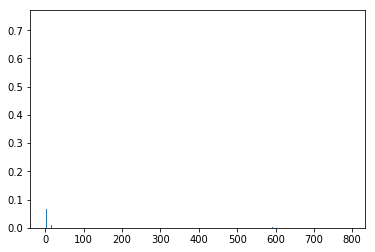

Index(['capa', 'mean_home'], dtype='object')

LGBMRegressor(boosting_type='gbdt', colsample_bytree=0.8, learning_rate=0.05,
       max_bin=255, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0, n_estimators=10,
       n_jobs=-1, num_iterations=300, num_leaves=4, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, scoring='mse',
       silent=True, subsample=0.9, subsample_for_bin=200000,
       subsample_freq=1)


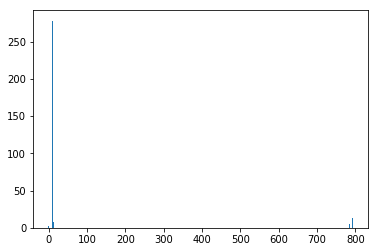

Index(['stage', 'temperature', 'capa', 'categorical_home', 'categorical_away',
       'match_num', 'categorical_match_num', 'nhk', 'mean_home', 'mean_away',
       'home_rank', 'away_rank', 'is_urawa', 'big_capa', 'fine', 'rain', '他',
       '休', '水', '祝'],
      dtype='object')

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)


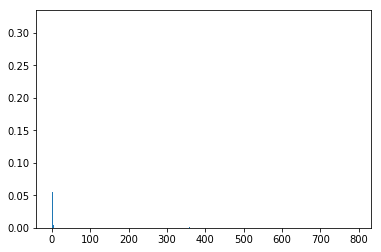

Index(['stage', 'categorical_home', 'mean_home'], dtype='object')

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estimators=150, random_state=None)


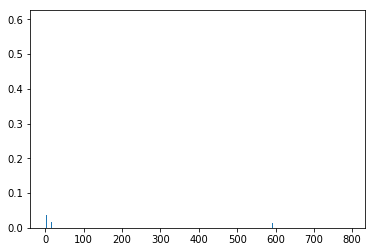

Index(['capa', 'mean_home'], dtype='object')



In [1151]:
for clf in [forest, lgbm, et, ada]:
    print(str(clf))
    plt.bar(x=range(X_train.shape[1]),height=clf.feature_importances_)
    plt.show()
    print(X_train.columns[clf.feature_importances_>0.1],end="\n\n")

In [1152]:
from sklearn.model_selection import KFold
def check_score(clf, X_train, y_train):
    kf = KFold(n_splits=10)
    print(str(clf))
    train_ls = []
    test_ls = []
    for train_id, test_id in kf.split(X_train):
        clf.fit(X_train.iloc[train_id,:], y_train.iloc[train_id])
        train_ls.append(get_score(clf, X_train.iloc[train_id,:],
                                  y_train.iloc[train_id]))
        test_ls.append(get_score(clf, X_train.iloc[test_id, :],
                                y_train.iloc[test_id]))
    print("train=",np.mean(train_ls),"+/-",np.std(train_ls))
    print("test=",np.mean(test_ls),"+/-",np.std(test_ls))

In [1153]:
for clf in [forest, et, ada, lgbm, knn]:
    check_score(clf, X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
train= 3574.64847309 +/- 36.3237173746
test= 3798.02833443 +/- 499.589967968
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
train= 3804.05986623 +/- 49.0155198684
test= 3876.50149123 +/- 511.370455566
AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estim

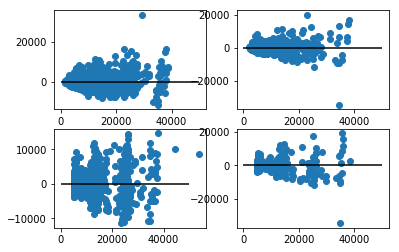

In [1154]:
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(lgbm.predict(X_train), y_train - lgbm.predict(X_train))
ax[0,0].hlines(y=0, xmin=0, xmax=50000)
ax[0,1].scatter(lgbm.predict(X_test), y_test - lgbm.predict(X_test))
ax[0,1].hlines(y=0, xmin=0, xmax=50000)
ax[1,0].scatter(ada.predict(X_train), y_train - ada.predict(X_train))
ax[1,0].hlines(y=0, xmin=0, xmax=50000)
ax[1,1].scatter(ada.predict(X_test), y_test - ada.predict(X_test))
ax[1,1].hlines(y=0, xmin=0, xmax=50000)

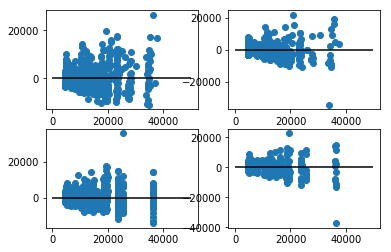

In [1155]:
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(forest.predict(X_train), y_train - forest.predict(X_train))
ax[0,0].hlines(y=0, xmin=0, xmax=50000)
ax[0,1].scatter(forest.predict(X_test), y_test - forest.predict(X_test))
ax[0,1].hlines(y=0, xmin=0, xmax=50000)
ax[1,0].scatter(et.predict(X_train), y_train - knn.predict(X_train))
ax[1,0].hlines(y=0, xmin=0, xmax=50000)
ax[1,1].scatter(et.predict(X_test), y_test - knn.predict(X_test))
ax[1,1].hlines(y=0, xmin=0, xmax=50000)

In [1156]:
from sklearn.model_selection import KFold
NFOLDS=5
kf = KFold(n_splits= 5, random_state=0)
ntrain = X_train.shape[0]
n_test = X_test.shape[0]
ntest_tr = true_test.shape[0]

def get_oof(clf, x_train, y_train, x_test, test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((n_test,))
    oof_test_tr = np.zeros((ntest_tr,))
    oof_train_skf = np.empty((NFOLDS, ntrain))
    oof_test_skf = np.empty((NFOLDS, n_test))
    oof_test_tr_skf = np.empty((NFOLDS, ntest_tr))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train_skf[i,:] = clf.predict(x_train)
        oof_test_skf[i, :] = clf.predict(x_test)
        oof_test_tr_skf[i,:] = clf.predict(test)
        
    oof_train[:] = oof_train_skf.mean(axis=0)
    oof_test[:] = oof_test_skf.mean(axis=0)
    oof_test_tr[:] = oof_test_tr_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1),\
    oof_test_tr.reshape(-1,1)

In [1157]:
for_tr, for_te, for_te_tr = get_oof(
    forest, X_train, y_train, X_test,true_test)
ada_tr, ada_te, ada_te_tr= get_oof(
    ada, X_train, y_train, X_test, true_test)
lgbm_tr, lgbm_te, lgbm_te_tr = get_oof(
    lgbm, X_train, y_train, X_test, true_test)
et_tr, et_te, et_te_tr= get_oof(
    et, X_train, y_train, X_test, true_test)
knn_tr, knn_te, knn_te_tr= get_oof(
    knn, X_train, y_train, X_test, true_test)

In [1158]:
X_train["for"] = for_tr
X_train["lgbm"] = lgbm_tr
X_train["ada"] = ada_tr
X_train["et"] = et_tr
X_train["knn"] = knn_tr
X_test["for"] = for_te
X_test["lgbm"] = lgbm_te
X_test["ada"] = ada_te
X_test["et"] = et_te
X_test["knn"] = knn_te
true_test["for"] = for_te_tr
true_test["lgbm"] = lgbm_te_tr
true_test["ada"] = ada_te_tr
true_test["et"] = et_te_tr
true_test["knn"] = knn_te_tr

In [1088]:
X_train.head(20)

,stage,temperature,capa,categorical_home,categorical_away,categorical_day,match_num,categorical_match_num,categorical_weather,nhk,...,休,土,日,水,祝,for,lgbm,ada,et,knn
615,2,21.4,3560,1,0,3,35,3,0,0,...,0,0,1,0,0,5275.626257,3907.990360,5552.951590,5199.910841,3144.0250
1427,1,21.8,20000,3,1,3,9,1,0,0,...,0,1,0,0,0,15172.472215,14845.111033,14860.618194,13706.437371,7101.4750
1700,2,24.3,15100,1,0,3,22,3,0,0,...,0,0,1,0,0,5500.651041,6115.289853,5656.417587,5640.393691,7164.4250
96,1,23.6,15600,2,1,2,12,2,0,0,...,0,1,0,0,0,11750.911310,11421.222457,11983.584641,12127.845526,8675.1250
814,1,28.7,17000,2,1,3,18,2,0,1,...,0,0,0,1,0,11750.911310,10789.108285,11983.584641,12186.173060,10700.2875
178,1,28.3,72327,4,1,2,22,3,0,0,...,0,1,0,0,0,27298.328269,28222.251241,28241.388576,25174.564960,28862.4625
1441,1,26.8,72327,4,1,1,11,2,0,2,...,0,0,0,0,1,30363.927204,28697.911263,32079.809830,25174.564960,26645.7500
1337,2,17.8,19637,1,0,2,40,3,0,0,...,0,0,1,0,0,5628.523098,6066.279507,5864.523297,5717.627214,7288.5000
665,2,24.0,40000,1,0,3,40,3,0,0,...,0,0,1,0,0,5640.272733,9388.981369,6274.290661,5717.627214,13404.8375
1876,2,22.8,49970,1,0,1,17,2,0,0,...,0,1,0,0,0,5479.135208,7433.573068,6409.943000,5511.740341,15117.7625


In [1089]:
print(X_train.columns)
print(true_test.columns)

Index(['stage', 'temperature', 'capa', 'categorical_home', 'categorical_away',
       'categorical_day', 'match_num', 'categorical_match_num',
       'categorical_weather', 'nhk',
       ...
       '休', '土', '日', '水', '祝', 'for', 'lgbm', 'ada', 'et', 'knn'],
      dtype='object', length=797)
Index(['stage', 'temperature', 'capa', 'categorical_home', 'categorical_away',
       'categorical_day', 'match_num', 'categorical_match_num',
       'categorical_weather', 'nhk',
       ...
       '休', '土', '日', '水', '祝', 'for', 'lgbm', 'ada', 'et', 'knn'],
      dtype='object', length=797)


In [1159]:
def get_mean(df):
    return (df.lgbm + df.knn + df["for"]  ) / 3

In [1160]:
X_train["mean"] = X_train.apply(get_mean, axis=1)
print(math.sqrt(mean_squared_error(X_train["mean"].values, y_train)))
X_test["mean"] = X_test.apply(get_mean, axis=1)
print(math.sqrt(mean_squared_error(X_test["mean"].values, y_test)))
true_test["mean"] = true_test.apply(get_mean, axis=1)

3213.275864198426
3566.121219658906


In [1094]:
X_train["mean"].shape
y_train.shape

(1367,)

In [ ]:
gs_forest.fit(X_train, y_train)
gs_ada.fit(X_train, y_train)
gs_et.fit(X_train, y_train)
#gs_lgbm.fit(X_train, y_train)
print(gs_forest.best_score_,":",gs_forest.best_params_)
print(gs_ada.best_score_,":",gs_ada.best_params_)
print(gs_et.best_score_,":",gs_et.best_params_)
#print(gs_lgbm.best_score_,":",gs_lgbm.best_params_)

mean_st_ver  
-2883883.02998 : {'max_depth': 9, 'n_estimators': 500}  
-3722355.78735 : {'learning_rate': 0.6, 'n_estimators': 150}  
-2692427.3154 : {'max_depth': 9, 'n_estimators': 700}  

In [1170]:
forest_st = RandomForestRegressor(n_estimators=700, max_depth=3)
forest_st.fit(X_train, y_train)
et_st = ExtraTreesRegressor(max_depth = 4, n_estimators = 700)
et_st.fit(X_train, y_train)
ada_st = AdaBoostRegressor(learning_rate = 0.05, n_estimators = 700)
#ada_st.fit(X_train, y_train)
bag = BaggingRegressor(
    n_estimators=600, n_jobs=-1, max_features=0.1, warm_start=True)
knn_st = KNeighborsRegressor(p=2, n_neighbors=16).fit(X_train, y_train)
lgbm_st = lgb.LGBMRegressor(n_jobs=-1, objective='regression',
             task='train',
             boosting='gbdt',
             num_iterations=300,
             learning_rate=0.5,
             num_leaves=4,
             tree_learner='serial',
             min_data_in_leaf=1,
             min_sum_hessian_in_leaf=0.1,
             boost_from_average=False,
             bagging_freq=0,
             feature_fraction=1.0,
             output_model='LGB_model.txt',
             is_sparse=False,
             is_training_metric=True,
             metric='mse',
             metric_freq=1)
#lgbm_st.fit(X_train, y_train)
print(get_score(forest_st, X_train, y_train))
print(get_score(forest_st, X_test, y_test))
print(get_score(et_st, X_train, y_train))
print(get_score(et_st, X_test, y_test))
"""
print(get_score(ada_st, X_train, y_train))
print(get_score(ada_st, X_test, y_test))
print(get_score(lgbm_st, X_train, y_train))
print(get_score(lgbm_st, X_test, y_test))
print(get_score(knn_st, X_train, y_train))
print(get_score(knn_st, X_test, y_test))
"""

2725.1805148409885
3419.3909034090525
2733.8712940356636
3429.0251113595027


'\nprint(get_score(ada_st, X_train, y_train))\nprint(get_score(ada_st, X_test, y_test))\nprint(get_score(lgbm_st, X_train, y_train))\nprint(get_score(lgbm_st, X_test, y_test))\nprint(get_score(knn_st, X_train, y_train))\nprint(get_score(knn_st, X_test, y_test))\n'

In [1171]:
for clf in [forest_st, et_st, ada_st, lgbm_st, knn_st]:
    check_score(clf, X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
train= 2706.80144072 +/- 33.2390964402
test= 2997.39885312 +/- 397.829107873
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
train= 2710.45481333 +/- 28.7830822579
test= 3034.08804936 +/- 342.384724053
AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estim

In [346]:
def capa_limi(df):
    if df["capa"] < df["mean"]:
        return df.capa
    else:
        return df["mean"]

# 結果提出

In [1176]:
pre = forest_st.predict(true_test)

In [1177]:
for i in range(len(pre.tolist())):
    if pre[i] > true_test.iloc[i,2]:
        pre[i] = true_test.iloc[i,2]

In [1178]:
pre

array([ 14017.01409086,  18389.57122404,  34945.77081366,  14032.48037886,
        28979.95794021,  14365.45921684,   4584.91007701,  14017.02502836,
        12179.52805449,  18103.92635803,  27015.07094526,  11652.44136684,
        22094.38967097,  14374.61647734,  14355.65584404,  14271.07553285,
        40426.40390427,  10550.49841112,  26431.23615715,  14244.47863603,
         7377.99298548,  13982.13344689,  17912.24226453,  10411.46154103,
        28971.66509083,  13705.86467275,  26187.8259109 ,  14549.32354888,
        17314.2025931 ,  14374.61647734,  15454.        ,  22003.25271282,
        15516.04640077,  36656.73422135,  11439.92234361,  13148.21778212,
        12499.95518113,  14470.60114686,  15448.8809559 ,  17394.59573756,
        10309.55137735,  12521.38694915,  25981.03166351,  14053.92065851,
        29471.9023304 ,  11646.06478889,  27616.7776597 ,  19615.3884606 ,
        18580.73204763,  16684.44577793,  39730.19157537,  16378.66936791,
        13649.58757684,  

In [1179]:
res = pd.Series(pre, index=test.index)
res

id
15822    14017.014091
15823    18389.571224
15824    34945.770814
15825    14032.480379
15827    28979.957940
15828    14365.459217
15829     4584.910077
15830    14017.025028
15831    12179.528054
15832    18103.926358
15833    27015.070945
15834    11652.441367
15836    22094.389671
15838    14374.616477
15840    14355.655844
15841    14271.075533
15842    40426.403904
15843    10550.498411
15844    26431.236157
15845    14244.478636
15846     7377.992985
15847    13982.133447
15848    17912.242265
15849    10411.461541
15850    28971.665091
15851    13705.864673
15852    26187.825911
15853    14549.323549
15854    17314.202593
15855    14374.616477
             ...     
16405     7006.522857
16406     3869.441014
16407     6903.466320
16408     4041.789532
16409    10411.461541
16410     7045.104351
16411     3918.160788
16412     3987.802338
16413     6050.327976
16414    10379.461783
16415     4282.849564
16416    10286.145558
16417     8764.284736
16418     9109.091984
16419  

In [1180]:
res.to_csv("result2.csv")